# **バックトラック直線探索を用いた勾配法の実装**


## ライブラリのインポート

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

## 目的関数とその勾配の設定

In [2]:
## 目的関数 f(x1,x2)の設定（入力は2次元ベクトル）
def objf(x):
    f = x[0]**4/2 - 2*(x[0]**2)*x[1] + 4*x[1]**2 + 8*x[0] + 8*x[1]
    return f

In [3]:
## 目的関数 f の勾配の設定（入力は2次元ベクトル）
def gradf(x):
    gf1 = 2*x[0]**3 - 4*x[0]*x[1] + 8
    gf2 = -2*x[0]**2 + 8*x[1] + 8
    gf = np.array([gf1,gf2])
    return gf

## Armijoの条件をもとに、ステップ幅を決めて、反復更新先を求める

In [4]:
## Armijoの条件を満たすalphaを決定して、その時の更新先を求める
def armijo(xold):
    # Armijoの条件を満たす alpha を決定する際のパラメータ
    alpha = 0.05
    rho = 0.8
    c = 0.01

    # Armijoの条件を満たすようになるまで反復計算
    while 1:
        xnew = xold - alpha * gradf(xold)
        fnew = objf(xnew)
        fnew_above = objf(xold) - c * alpha * LA.norm(gradf(xold))**2

        if fnew > fnew_above:
            alpha = rho * alpha
        else:
            break
    
    return xnew, fnew

## 勾配法のアルゴリズムのメイン部分

In [5]:
## 初期値とパラメータの設定
x0 = np.array([3,1])
f0 = objf(x0)
eps = 1e-8  # 反復終了判定

## 更新履歴の格納
x1 = [] # x（x1成分）の更新履歴を格納
x2 = [] # x（x2成分）の更新履歴を格納
f = [] # fの更新履歴を格納
k = 0 # 反復更新回数

# print(k,x0,f0)
x1.append(x0[0])
x2.append(x0[1])
f.append(f0)

In [6]:
### 反復更新
xnew = x0 # 更新後のx座標を格納
fnew = f0 # 更新後の目的関数fの値を格納

while 1:
    k = k + 1 ##繰り返し回数の更新
    xold = xnew ## 更新前のxの値
    fold = fnew ## 更新前のfの値
    xnew, fnew = armijo(xold) ## 更新後のxの値とその時の目的関数fの値
    
    print(k,xnew,fnew)
    x1.append(xnew[0])
    x2.append(xnew[1])
    f.append(fnew)

    if (fold - fnew < eps):
        break

1 [0.5 1.1] 17.121250000000003
2 [0.1975 0.285 ] 4.163427181269531
3 [-0.19201287 -0.22509938] -3.116941061191502
4 [-0.58266055 -0.53137273] -7.364415471379441
5 [-0.90095763 -0.68487431] -9.369137042485821
6 [-1.10441613 -0.72975212] -10.019108263656605
7 [-1.20851663 -0.71587777] -10.18758618368581
8 [-1.25898123 -0.68347542] -10.248269428880308
9 [-1.28733191 -0.65158188] -10.28024622358901
10 [-1.30623182 -0.62522678] -10.298828708003457
11 [-1.32001889 -0.60451191] -10.309778630319421
12 [-1.33041879 -0.58846216] -10.31624897951719
13 [-1.33835256 -0.57607588] -10.320077460567227
14 [-1.34442999 -0.56652677] -10.32234488659913
15 [-1.34909423 -0.55916686] -10.32368872040309
16 [-1.35267787 -0.5534946 ] -10.324485595628218
17 [-1.35543336 -0.54912302] -10.324958324795176
18 [-1.35755327 -0.54575385] -10.325238848869152
19 [-1.35918488 -0.54315722] -10.32540535562487
20 [-1.36044109 -0.54115598] -10.325504204876044
21 [-1.36140849 -0.53961359] -10.325562896511999
22 [-1.36215363 -0

## 結果のプロット

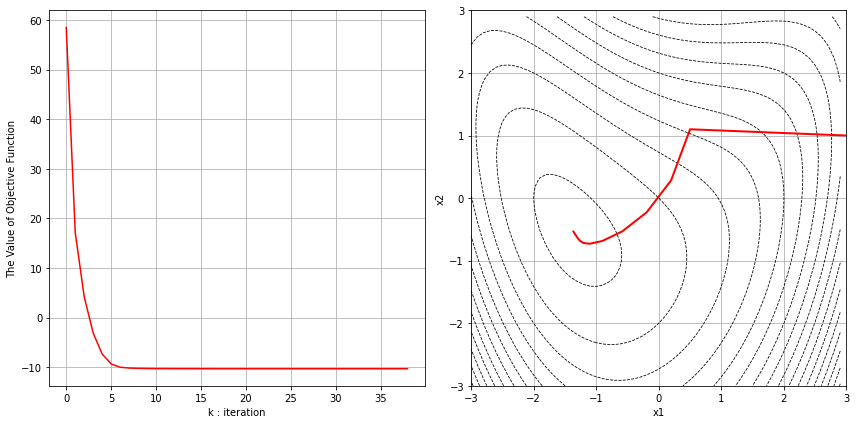

In [7]:
########## Plot the Result ##########
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

## 目的関数 f の変化
ax1.plot(np.linspace(0, k, k+1),f,color='red',linewidth=1.5)
ax1.grid()
ax1.set_xlabel('k : iteration')
ax1.set_ylabel('The Value of Objective Function')

## 点xの変化と等高線
X,Y = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
Z = X**4/2 - 2*(X**2)*Y + 4*Y**2 + 8*X + 8*Y
cont = ax2.contour(X,Y,Z,linewidths=0.8,colors='black',linestyles='dashed',levels=20)

ax2.plot(x1,x2,color='red',linewidth=2)
ax2.grid()
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_xlim(-3, 3)
ax2.set_ylim(-3, 3)

## グラフの保存
fig.tight_layout()
fig.savefig('figure_objective_function.pdf')